# **Predicting the Stock Market Alpha Signal using Microblogging Data**
![Twitter impact on stocks](https://drive.google.com/uc?id=1Ll1pOzwhZq5qcBn0ypizCsjsDJHJ4C3M)



## **Objective :**
#### **To analyze the significance of the microblogging(Twitter) data in  the stock market alpha signal prediction.**


## **Agenda**

**1.**   **Business Understanding of the problem.**
       
**2.**  **Import Data.**


*   2.1 CSV files
    
*   2.2 JSON files


**3.**   **Alpha Signal Prediction Without Sentiment Score.**


*       3.1 Exploratory Data Analysis (EDA)
    
*       3.2 Model Building And predictions alpha scores   


**4.**   **Twitter Data Sentiment Analysis.**


*   4.1 Exploratory Data Analysis (EDA)
    
*   4.2 Model Building To predict the sentiment score


**5.**  **Alpha signal Prediction with Sentiment Score.**


*       5.1 Adding predicted sentiment score to the Alpha model in 3rd step.
*       5.2 Model Building to predict the Alpha signal values.
*       5.3 Comparison Between the models and prediction scores.



**6.**   **Conclusion**






### **2. Import Data**

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import collections
import os
import re
import nltk
import random
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,classification_report

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
!pip install emoji
import emoji

import mlxtend
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison

In [0]:
# Read Train and Test Json files

sentiment_file = pd.read_json('train_data-1573118738755.json')
sentiment_test_file = pd.read_json('test_data.json')


In [0]:
# Read train and test csv files

stocks_data = pd.read_csv('train_factors-1573207730757.csv')
test_stocks_data =  pd.read_csv('test_factors.csv')

##### **Load Json Files**

In [0]:
## Train data
import json

with open('train_data-1573118738755.json', 'r') as f:
    Sentiment_data = json.load(f)
   
## Test Data

with open('test_data.json', 'r') as f:
    test_Sentiment_data = json.load(f)

##### **Normalize the json file to read it into a tabular format**

In [0]:
from pandas.io.json import json_normalize
data = json_normalize(Sentiment_data['records'])
test_data = json_normalize(test_Sentiment_data['records'])

##### **Rearrange columns and store in Data Frame**

In [0]:
# Train Data

tweet_data = data[['timestamp','ticker','stocktwit_tweet','sentiment_score']]

## Test Data

test_tweet_data = test_data[['timestamp','ticker','stocktwit_tweet']]

##### **Convert the Data extracted from JSON file CSV** 

In [0]:
#tweet_data.to_csv("TrainTweetJSONfile.csv", index=False)
#test_tweet_data.to_csv("TestTweetJSONfile.csv", index=False)

##### **Import and validate the csv converted JSON file**

In [0]:
#tweet_data = pd.read_csv('TrainTweetJSONfile.csv')
#test_tweet_data = pd.read_csv('TestTweetJSONfile.csv')

In [7]:
tweet_data.head()

,timestamp,ticker,stocktwit_tweet,sentiment_score
0,2018-09-19 18:38:28+00:00,$AMD,$AMD going up but hesitating however chart is ...,3
1,2018-10-09 03:51:06+00:00,$CAT,@inforlong @MariaGascon Despite\nChina trade w...,3
2,2018-07-12 13:35:32+00:00,$AVGO,$AVGO WTF?,2
3,2018-07-19 03:32:50+00:00,$PH,$PH\n New Insider Filing On: \n MULLER KLAUS P...,2
4,2018-08-23 19:07:54+00:00,$FB,$FB if it bounces tommorrow do the right thing...,3


In [8]:
test_tweet_data.head()

,timestamp,ticker,stocktwit_tweet
0,2018-10-25 14:26:16+00:00,$CELG,$CELG nothing to be exited about
1,2018-07-13 13:50:39+00:00,$AMD,$AMD yall exhaust your buyer on first green ca...
2,2018-09-25 19:10:54+00:00,$AMD,$AMD day traders day.
3,2018-07-27 22:45:48+00:00,$CBS,$CBS https://tenor.com/wLB8.gif
4,2018-07-31 14:59:06+00:00,$MU,$MU weak price action so far today. Don’t be a...


## **1. Alpha signal Prediction Model Without sentiment score**

###  **Exploratory Data Analysis (EDA)**

In [9]:
stocks_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,21/08/18,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,11/10/18,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,21/08/18,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,10/07/18,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,12/09/18,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


### **Convert date column in standard python date format**

In [0]:
# Train data
stocks_data['date'] = stocks_data['date'].apply(lambda x: '20'+x.split('/')[-1]+'-'+x.split('/')[1]+'-'+x.split('/')[0])
stocks_data['date']=pd.to_datetime(stocks_data['date']).dt.date

In [0]:
# Performing same steps on the test data
test_stocks_data['date'] = test_stocks_data['date'].apply(lambda x: '20'+x.split('/')[-1]+'-'+x.split('/')[1]+'-'+x.split('/')[0])
test_stocks_data['date']=pd.to_datetime(test_stocks_data['date']).dt.date

In [12]:
stocks_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,2018-08-21,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,2018-10-11,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,2018-08-21,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,2018-07-10,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,2018-09-12,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [13]:
test_stocks_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,270007,2018-07-21,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,270008,2018-10-05,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,270009,2018-10-01,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,270010,2018-10-24,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,270011,2018-07-27,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


### **Clean Ticker column (Remove $ and Make UpperCase)**

In [0]:
# Regular Expression function to remove the $ symbol

def tickerNorm(ticker):
  
  remove_dollar = re.sub(r'[^\w]', '', ticker)
 

  return remove_dollar

In [0]:
stocks_data['ticker'] = stocks_data.ticker.apply(tickerNorm) # Remove $ sign
stocks_data['ticker']  = stocks_data['ticker'].str.upper() # Convert all tickers to upper

In [0]:
# Perform same steps on test csv file

test_stocks_data['ticker'] = test_stocks_data.ticker.apply(tickerNorm) # Remove $ sign
test_stocks_data['ticker']  = test_stocks_data['ticker'].str.upper() # Convert all tickers to upper

### **Visualizations**

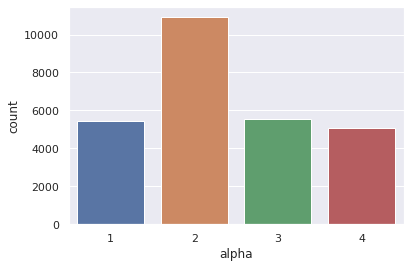

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x="alpha", data=stocks_data)

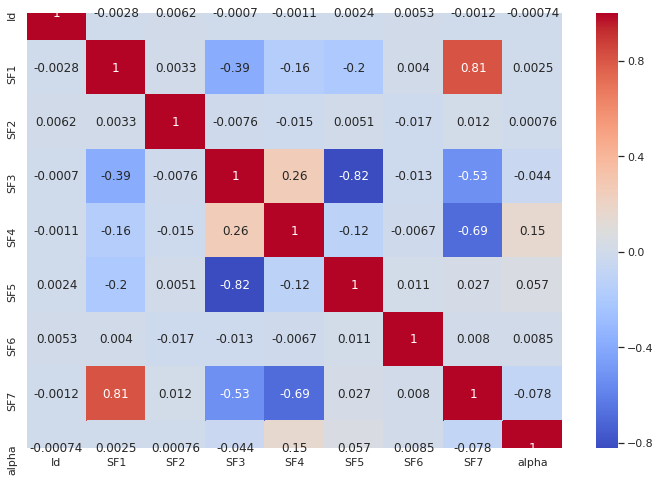

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(stocks_data.corr(method='pearson'),cmap='coolwarm',annot = True)
plt.show();

### **Time Series Attempt**

In [0]:
stock_timeSeries_data = stocks_data


In [22]:
stock_timeSeries_data.head(3)

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,2018-08-21,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,2018-10-11,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,2018-08-21,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1


In [0]:
stock_timeSeries_data['date']=pd.to_datetime(stock_timeSeries_data['date'])
stock_timeSeries_data = stock_timeSeries_data.sort_values(by=['date'])

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


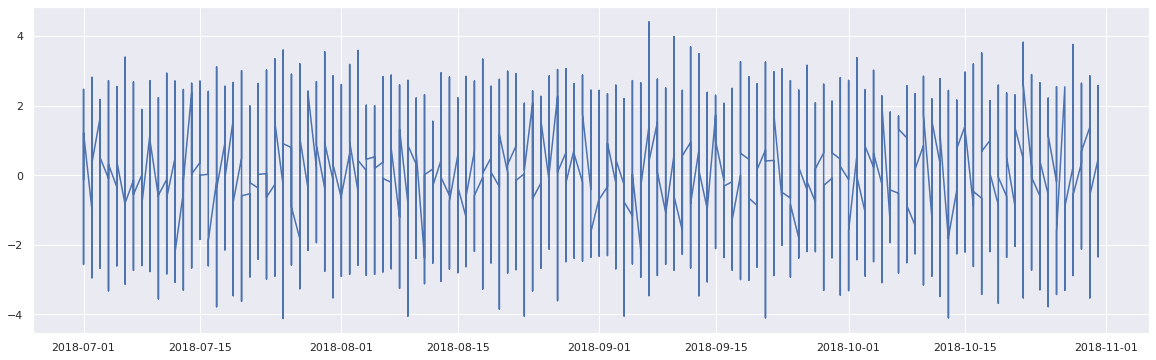

In [24]:
plt.figure(figsize=(20,6))
TimeSeries = stock_timeSeries_data[['date','alpha']]
plt.plot(TimeSeries.date,stock_timeSeries_data.SF1)

In [25]:
TimeSeries.date = pd.to_datetime(TimeSeries.date)
TimeSeries.set_index('date', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


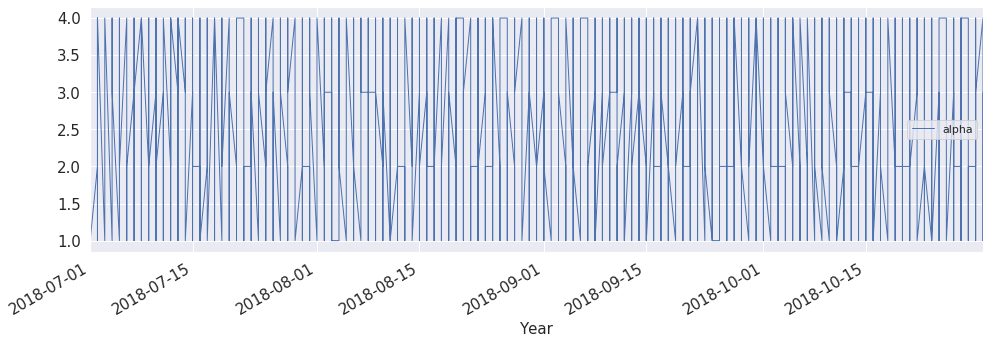

In [26]:
TimeSeries.plot(figsize=(16,5), linewidth=1, fontsize=15)
plt.xlabel('Year', fontsize=15);

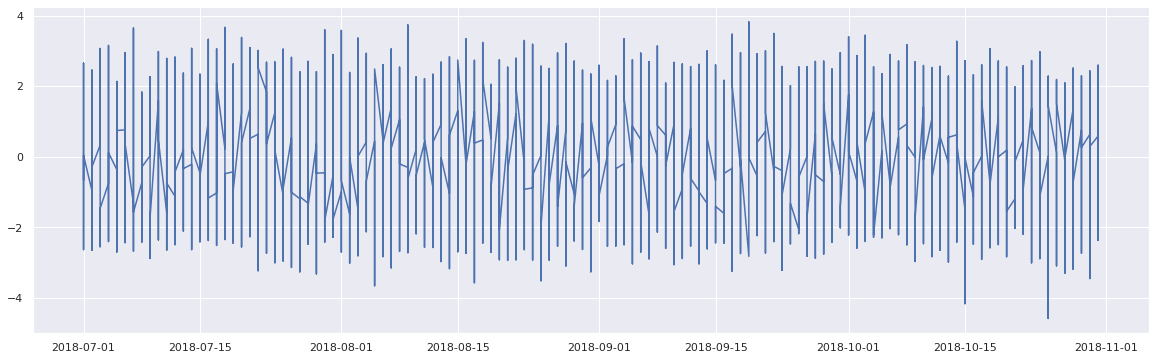

In [27]:
plt.figure(figsize=(20,6))
TimeSeries = stock_timeSeries_data[['date','alpha']]
plt.plot(TimeSeries.date,stock_timeSeries_data.SF2)

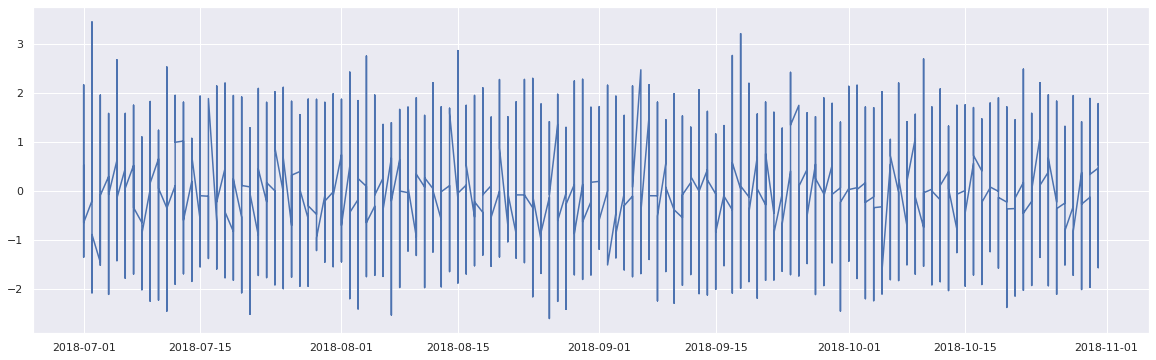

In [28]:
plt.figure(figsize=(20,6))
TimeSeries = stock_timeSeries_data[['date','alpha']]
plt.plot(TimeSeries.date,stock_timeSeries_data.SF3)

### **Building Models to predict the Alpha value**

#### **Removing date and ticker columns before proceeding to modeling** 

In [17]:
final_stock_data = stocks_data[['SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6','alpha']]
final_stock_data.head()

,SF1,SF2,SF3,SF4,SF5,SF6,alpha
0,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,2
1,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,3
2,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,1
3,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,2
4,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,2


#### **Train-Validation data split**

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree

In [19]:
train_x,val_x,train_y,val_y = train_test_split(final_stock_data.iloc[:,:-1],final_stock_data.iloc[:,-1],test_size=0.3,random_state=1)
print(final_stock_data.shape)
print(train_x.shape)
print(val_x.shape)

(27006, 7)
(18904, 6)
(8102, 6)


#### **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") #just to ignore any warnings

#Training the model
logreg = LogisticRegression()
lr = logreg.fit(train_x,train_y)


#Predicting on train data
lr_train_pred = lr.predict(train_x)

#Predicting on validaiton data
lr_val_pred=lr.predict(val_x)

In [67]:
print("Train_Classification Report: \n\n", classification_report(train_y,lr_train_pred))
print("\n\nTest_Classification Report: \n\n", classification_report(val_y,lr_val_pred))

Train_Classification Report: 

               precision    recall  f1-score   support

           1       0.79      0.09      0.16      3801
           2       0.44      0.97      0.61      7705
           3       0.38      0.14      0.20      3853
           4       0.05      0.00      0.00      3545

    accuracy                           0.44     18904
   macro avg       0.42      0.30      0.24     18904
weighted avg       0.43      0.44      0.32     18904



Test_Classification Report: 

               precision    recall  f1-score   support

           1       0.80      0.09      0.16      1666
           2       0.43      0.97      0.60      3207
           3       0.39      0.13      0.20      1683
           4       0.06      0.00      0.00      1546

    accuracy                           0.43      8102
   macro avg       0.42      0.30      0.24      8102
weighted avg       0.42      0.43      0.31      8102



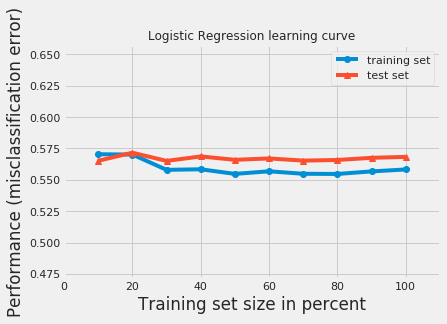

In [68]:
plot_learning_curves(train_x, train_y, val_x, val_y,logreg)
plt.title('Logistic Regression learning curve')
plt.show()

#### **Support Vector Claasifier (SVC)**

In [32]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced')
print(svc)

## Fit
svc.fit(train_x, train_y)

## Predict
svc_train_predictions = svc.predict(train_x)
svc_test_predictions = svc.predict(val_x)



SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [36]:
from sklearn.metrics import classification_report
print(classification_report(train_y, svc_train_predictions))
print(classification_report(val_y, svc_test_predictions)) 

              precision    recall  f1-score   support

           1       0.70      0.49      0.58      3801
           2       0.72      0.88      0.79      7705
           3       0.67      0.44      0.53      3853
           4       0.50      0.61      0.55      3545

    accuracy                           0.66     18904
   macro avg       0.65      0.60      0.61     18904
weighted avg       0.67      0.66      0.65     18904

              precision    recall  f1-score   support

           1       0.70      0.47      0.56      1666
           2       0.70      0.88      0.78      3207
           3       0.63      0.41      0.50      1683
           4       0.48      0.58      0.53      1546

    accuracy                           0.64      8102
   macro avg       0.63      0.59      0.59      8102
weighted avg       0.64      0.64      0.63      8102



In [0]:
plot_learning_curves(train_x, train_y, val_x, val_y,svc)
plt.title('Support vector learning curve')
plt.show()

#### **Decison Tree Classifier**

In [44]:
dtc = DecisionTreeClassifier()

param_grid = {"max_depth" : [4,6,8,10],'max_features':['log2','sqrt']}

dtc_cv_grid = GridSearchCV(estimator = dtc, param_grid = param_grid,
                                        scoring ="neg_mean_squared_error")
dtc_cv_grid.fit(train_x, train_y)

dtc_cv_grid.best_estimator_.fit(train_x, train_y)
pred_train = dtc_cv_grid.best_estimator_.predict(train_x)
pred_val = dtc_cv_grid.best_estimator_.predict(val_x)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [45]:
from sklearn.metrics import classification_report
print(classification_report(train_y, pred_train)) 
print(classification_report(val_y, pred_val))

              precision    recall  f1-score   support

           1       0.71      0.51      0.60      3801
           2       0.66      0.95      0.78      7705
           3       0.71      0.46      0.55      3853
           4       0.61      0.46      0.53      3545

    accuracy                           0.67     18904
   macro avg       0.67      0.59      0.61     18904
weighted avg       0.67      0.67      0.65     18904

              precision    recall  f1-score   support

           1       0.60      0.41      0.48      1666
           2       0.62      0.91      0.74      3207
           3       0.55      0.36      0.44      1683
           4       0.49      0.37      0.42      1546

    accuracy                           0.59      8102
   macro avg       0.57      0.51      0.52      8102
weighted avg       0.58      0.59      0.56      8102



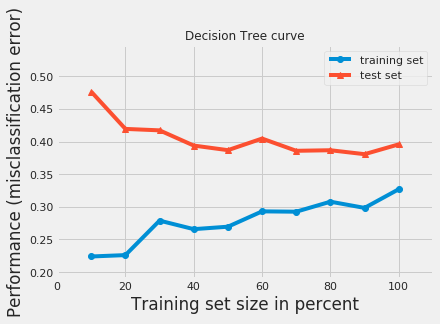

In [47]:
plot_learning_curves(train_x, train_y, val_x, val_y,dtc_cv_grid.best_estimator_)
plt.title('Decision Tree curve')
plt.show()

#### **Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,f1_score

##### **Applying Grid Search to find best parameters**

In [0]:


## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
#rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced_subsample')
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"

param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20],
           "class_weight" : ['balanced','balanced_subsample']}
 
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 3,
                                scoring = make_scorer(lambda yt,yp: f1_score(yt,yp,pos_label = 'yes',average='macro')))
rfc_cv_grid.fit(train_x, train_y)
rfc_cv_grid.best_estimator_

In [0]:
rfc_cv_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=18, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False) 

In [0]:
rf.fit(train_x,train_y) 

train_pred = rf.predict(train_x)
Val_pred= rf.predict(val_x)

 

In [50]:
from sklearn.metrics import classification_report
print(classification_report(train_y, train_pred))
print(classification_report(val_y, Val_pred)) 

              precision    recall  f1-score   support

           1       0.78      0.61      0.68      3801
           2       0.80      0.87      0.83      7705
           3       0.74      0.59      0.65      3853
           4       0.61      0.76      0.68      3545

    accuracy                           0.74     18904
   macro avg       0.73      0.71      0.71     18904
weighted avg       0.75      0.74      0.74     18904

              precision    recall  f1-score   support

           1       0.68      0.52      0.58      1666
           2       0.76      0.83      0.79      3207
           3       0.59      0.46      0.52      1683
           4       0.51      0.66      0.58      1546

    accuracy                           0.66      8102
   macro avg       0.64      0.62      0.62      8102
weighted avg       0.66      0.66      0.65      8102



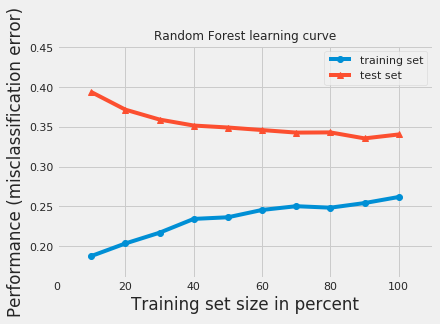

In [51]:
plot_learning_curves(train_x, train_y, val_x, val_y,rf)
plt.title('Random Forest learning curve')
plt.show()

#### **Random Forest Feature Importance**

In [0]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_x.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index = train_x.columns)

In [0]:
## Sort importances  
feat_importances_ordered = feat_importances.nlargest(n=10)
feat_importances_ordered
## Plot Importance
%matplotlib notebook
feat_importances_ordered.plot(kind='barh')
plt.show()

<IPython.core.display.Javascript object>

#### **GBoost**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
GBM_model = GradientBoostingClassifier(n_estimators=20,
                                       learning_rate=0.3,
                                       subsample=0.8)
GBM_model

GBM_model = GradientBoostingClassifier(n_estimators=20,
                                       learning_rate=0.3,
                                       subsample=0.8)
GBM_model.fit(X=train_x, y=train_y)
pred_train = GBM_model.predict(train_x)
pred_val = GBM_model.predict(val_x)

 

In [0]:

print(classification_report(train_y, pred_train))
print(classification_report(val_y, pred_val)) 

              precision    recall  f1-score   support

           1       0.71      0.49      0.58      3801
           2       0.67      0.96      0.79      7705
           3       0.63      0.43      0.51      3853
           4       0.59      0.44      0.51      3545

    accuracy                           0.66     18904
   macro avg       0.65      0.58      0.60     18904
weighted avg       0.66      0.66      0.64     18904

              precision    recall  f1-score   support

           1       0.70      0.45      0.54      1666
           2       0.64      0.95      0.77      3207
           3       0.57      0.38      0.46      1683
           4       0.57      0.43      0.49      1546

    accuracy                           0.63      8102
   macro avg       0.62      0.55      0.56      8102
weighted avg       0.62      0.63      0.60      8102



#### **XGBoost**

In [0]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

XGB_model.fit(train_x,train_y)

Train_pred = XGB_model.predict(train_x)
Test_pred = XGB_model.predict(val_x)




In [0]:
from sklearn.metrics import classification_report
print(classification_report(train_y, Train_pred))
print(classification_report(val_y, Test_pred)) 

              precision    recall  f1-score   support

           1       0.71      0.48      0.58      3801
           2       0.65      0.96      0.78      7705
           3       0.59      0.42      0.49      3853
           4       0.61      0.37      0.46      3545

    accuracy                           0.65     18904
   macro avg       0.64      0.56      0.58     18904
weighted avg       0.64      0.65      0.62     18904

              precision    recall  f1-score   support

           1       0.69      0.45      0.55      1666
           2       0.63      0.96      0.76      3207
           3       0.55      0.39      0.45      1683
           4       0.60      0.37      0.46      1546

    accuracy                           0.62      8102
   macro avg       0.62      0.54      0.55      8102
weighted avg       0.62      0.62      0.59      8102



#### **MLP Classifier**

##### **MLP Grid Search CV**

In [0]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,recall_score

mlp_grid=  MLPClassifier(activation='relu',random_state=1234)
# Use a grid over parameters of interest


param_grid = {"batch_size" : [ 64, 128,256],
           "hidden_layer_sizes" : [(60,), (100,), (120,)],
           "max_iter" : [50, 100]}
 
mlp_cv_grid = GridSearchCV(estimator = mlp_grid, param_grid = param_grid, cv = 3,
                                scoring = make_scorer(lambda yt,yp: recall_score(yt,yp,pos_label = 1,average='macro')))
mlp_cv_grid.fit(train_x,train_y)
mlp_cv_grid.best_estimator_


In [63]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(120,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
model.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(120,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
sklearn_mlp_train_preds = model.predict(train_x)
sklearn_mlp_val_preds = model.predict(val_x)

In [55]:
print("Train_Classification Report: \n\n", classification_report(train_y,sklearn_mlp_train_preds))
print("\n\nTest_Classification Report: \n\n", classification_report(val_y,sklearn_mlp_val_preds))

Train_Classification Report: 

               precision    recall  f1-score   support

           1       0.67      0.63      0.65      3801
           2       0.85      0.97      0.90      7705
           3       0.68      0.50      0.58      3853
           4       0.70      0.72      0.71      3545

    accuracy                           0.76     18904
   macro avg       0.72      0.71      0.71     18904
weighted avg       0.75      0.76      0.75     18904



Test_Classification Report: 

               precision    recall  f1-score   support

           1       0.66      0.61      0.64      1666
           2       0.84      0.97      0.90      3207
           3       0.64      0.47      0.54      1683
           4       0.69      0.71      0.70      1546

    accuracy                           0.74      8102
   macro avg       0.71      0.69      0.69      8102
weighted avg       0.73      0.74      0.73      8102



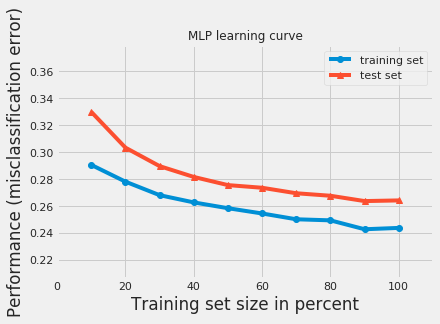

In [69]:
plot_learning_curves(train_x, train_y, val_x, val_y,model)
plt.title('MLP learning curve')
plt.show()

### **Results on Test Data**

## **4. Twitter Data Sentiment Analysis.**

### **4.1 Twitter Data Exploratory Data analysis (EDA)**

##### **Bring time stamp into YYYY-MM-DD format**

In [20]:
tweet_data.head()

,timestamp,ticker,stocktwit_tweet,sentiment_score
0,2018-09-19 18:38:28+00:00,$AMD,$AMD going up but hesitating however chart is ...,3
1,2018-10-09 03:51:06+00:00,$CAT,@inforlong @MariaGascon Despite\nChina trade w...,3
2,2018-07-12 13:35:32+00:00,$AVGO,$AVGO WTF?,2
3,2018-07-19 03:32:50+00:00,$PH,$PH\n New Insider Filing On: \n MULLER KLAUS P...,2
4,2018-08-23 19:07:54+00:00,$FB,$FB if it bounces tommorrow do the right thing...,3


In [0]:
tweet_data['timestamp'] = pd.to_datetime(tweet_data['timestamp'], format='%Y-%m-%d').dt.date
tweet_data = tweet_data.rename(columns = {"timestamp": "date"}) 

In [0]:
# Performing same actions on Test Data
test_tweet_data['timestamp'] = pd.to_datetime(test_tweet_data['timestamp'], format='%Y-%m-%d').dt.date
test_tweet_data = test_tweet_data.rename(columns = {"timestamp": "date"}) 

##### **Change sentiment score levels**

In [0]:
#tweet_data.sentiment_score.replace([0,1,2,3,4],[1,1,2,3,3], inplace=True)


In [0]:
#test_tweet_data.sentiment_score.replace([0,1,2,3,4],[1,1,2,3,3], inplace=True)

#### **Cleaning tweets and Ticker column**

##### **Steps to clean the twitter data**


* Step A : Remving html entities
* Step B : Removing "@user" from all the tweets
* Step C : Converting emojis to the words.
* Step D : Changing all the tweets into lowercase
* Step E : Replacing Special Characters with space
* Step F : Replacing Numbers (integers) with space
* Step G : Editing Stopwords list and removing stopwords
* Step H : Lemitize the tweets




In [23]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
wordnet_lemmatizer = WordNetLemmatizer()
# Definition to clean the twitter data

def normalizer(tweet):
    remove_url = re.sub(r'[a-z]*[:.]+\S+',"",tweet)     # removes hyperlinks http/https/www.
    demojize = emoji.demojize(remove_url)                # Convert emoji to text
    only_letters = re.sub("[^a-zA-Z]", " ",demojize)      # removes symbols/Numbers/punctuations
    tokens = nltk.word_tokenize(only_letters)[2:]          # Tokenizes - splits into indevidual words
    lower_case = [l.lower() for l in tokens]                # converts all words into lower case
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in lower_case]        # Brings words into root format 
    return lemmas

# Definition to remove $ from ticker column   

def tickerNorm(ticker):
  
  remove_dollar = re.sub(r'[^\w]', '', ticker)
 
  return remove_dollar

In [0]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
tweet_data['normalized_tweet'] = tweet_data.stocktwit_tweet.apply(normalizer)  # clean the tweets
tweet_data['ticker'] = tweet_data.ticker.apply(tickerNorm)  #remove $ sign
tweet_data['ticker']  = tweet_data['ticker'].str.upper() # Convert all tickers to upper

In [0]:
# Performing same action on Test Data
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
test_tweet_data['normalized_tweet'] = test_tweet_data.stocktwit_tweet.apply(normalizer)
test_tweet_data['ticker'] = test_tweet_data.ticker.apply(tickerNorm)
test_tweet_data['ticker']  = test_tweet_data['ticker'].str.upper() 

### **Remove Stopwords (Remove  up, down and important stopwords form stopwords nltk lab)**

In [0]:
stopwords = set(stopwords.words('english'))
to_remove = ['up', 'down']
new_stopwords = [word for word in stopwords if word not in to_remove ]

tweet_data['normalized_tweet'] = list(filter(lambda l: l not in new_stopwords, tweet_data['normalized_tweet']))

# Removing Brackets and commas from the Normalized tweet

pattern = r'\.|\,|\[|\]|\''
tweet_data['normalized_tweet']=tweet_data['normalized_tweet'].apply(lambda x: re.sub(pattern," ",str(x)))

In [0]:
# Perform same steps on test data

test_tweet_data['normalized_tweet'] = list(filter(lambda l: l not in new_stopwords, test_tweet_data['normalized_tweet']))

# Removing Brackets and commas from the Normalized tweet

pattern = r'\.|\,|\[|\]|\''
test_tweet_data['normalized_tweet']=test_tweet_data['normalized_tweet'].apply(lambda x: re.sub(pattern," ",str(x)))

In [29]:
tweet_data.head()

,date,ticker,stocktwit_tweet,sentiment_score,normalized_tweet
0,2018-09-19,AMD,$AMD going up but hesitating however chart is very stable and going upward,3,up but hesitating however chart is very stable and going upward
1,2018-10-09,CAT,@inforlong @MariaGascon Despite\nChina trade war $CAT held very well 👍,3,despite china trade war cat held very well thumb up
2,2018-07-12,AVGO,$AVGO WTF?,2,
3,2018-07-19,PH,$PH\n New Insider Filing On: \n MULLER KLAUS PETER\nTransaction Code: \n http://www.filingscanner.com/Alerts/PH.php,2,insider filing on muller klaus peter transaction code
4,2018-08-23,FB,$FB if it bounces tommorrow do the right thing and GTFO,3,it bounce tommorrow do the right thing and gtfo


In [30]:
test_tweet_data.head()

,date,ticker,stocktwit_tweet,normalized_tweet
0,2018-10-25,CELG,$CELG nothing to be exited about,to be exited about
1,2018-07-13,AMD,"$AMD yall exhaust your buyer on first green candle,,,, byeeeeee",exhaust your buyer on first green candle byeeeeee
2,2018-09-25,AMD,$AMD day traders day.,trader day
3,2018-07-27,CBS,$CBS https://tenor.com/wLB8.gif,
4,2018-07-31,MU,"$MU weak price action so far today. Don’t be afraid to go short, it’s gonna break support and free fall soon",price action so far today don t be afraid to go short it s gon na break support and free fall soon


### **Twitter data Visualizations**

#### **Feature Distibutions**

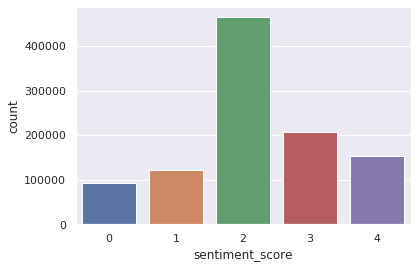

In [75]:
sns.set(style="darkgrid")
ax = sns.countplot(x="sentiment_score", data=tweet_data)


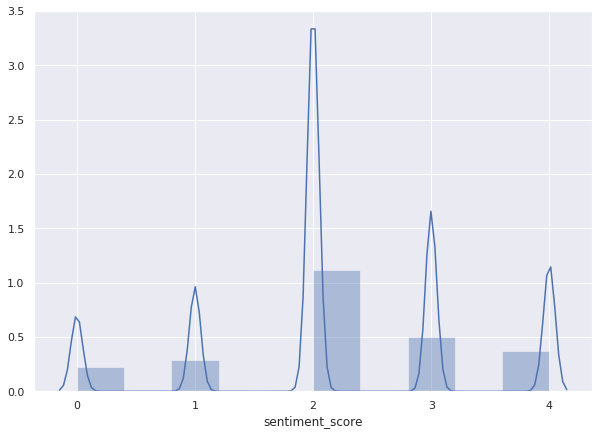

In [83]:
plt.figure(figsize=(10, 7))
sns.distplot(tweet_data['sentiment_score'],bins=10)

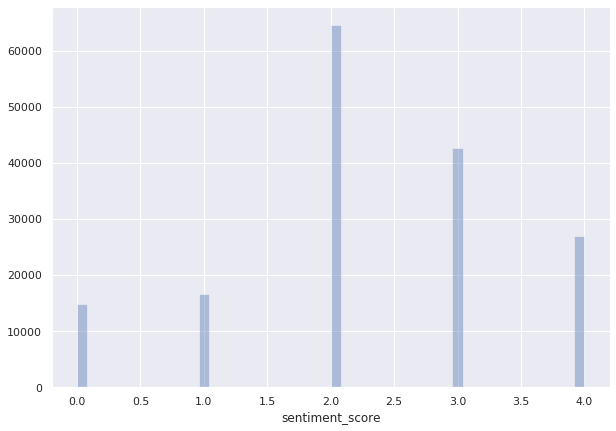

In [84]:
df = tweet_data[tweet_data.ticker == 'AMD']
plt.figure(figsize=(10, 7))
sns.distplot(df['sentiment_score'],  kde=False, label='AMD Ticker')

#### **Word Clouds**

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

#### **Most Common Words**

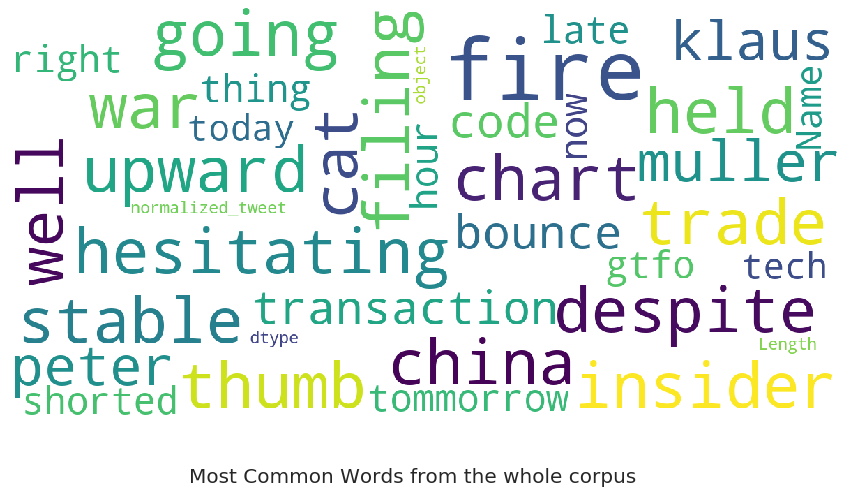

In [77]:
show_wordcloud(tweet_data['normalized_tweet'],'Most Common Words from the whole corpus')

#### **Common words in Neutral Tweets**

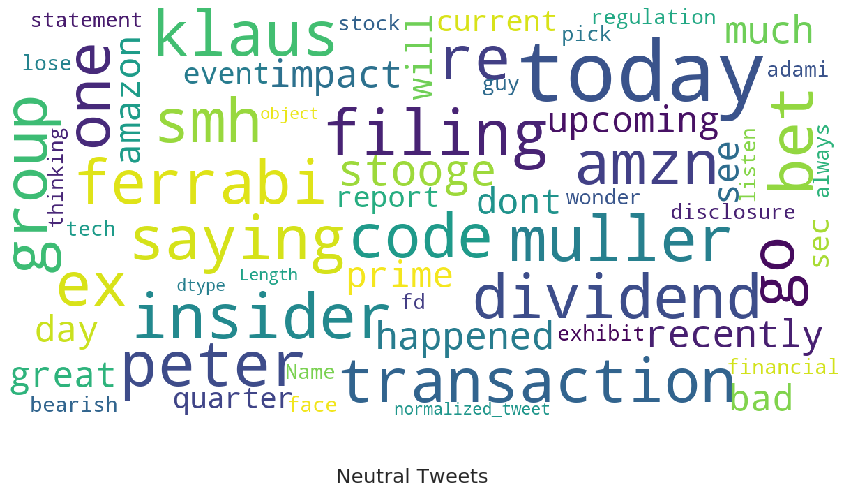

In [85]:
show_wordcloud(tweet_data[tweet_data['sentiment_score'] == 2]['normalized_tweet'],'Neutral Tweets')

#### **Common Words in Negative Tweets**


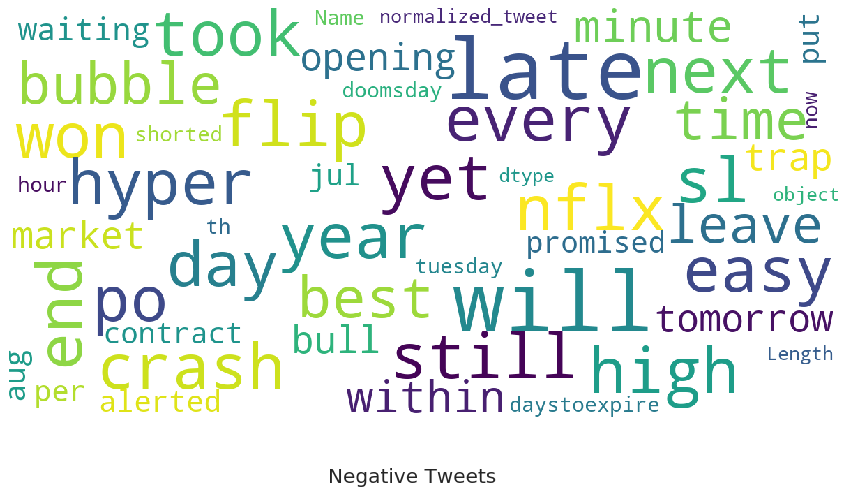

In [86]:
show_wordcloud(tweet_data[tweet_data['sentiment_score'] == 0]['normalized_tweet'],'Negative Tweets')

#### **Common Words in Positive reviews**

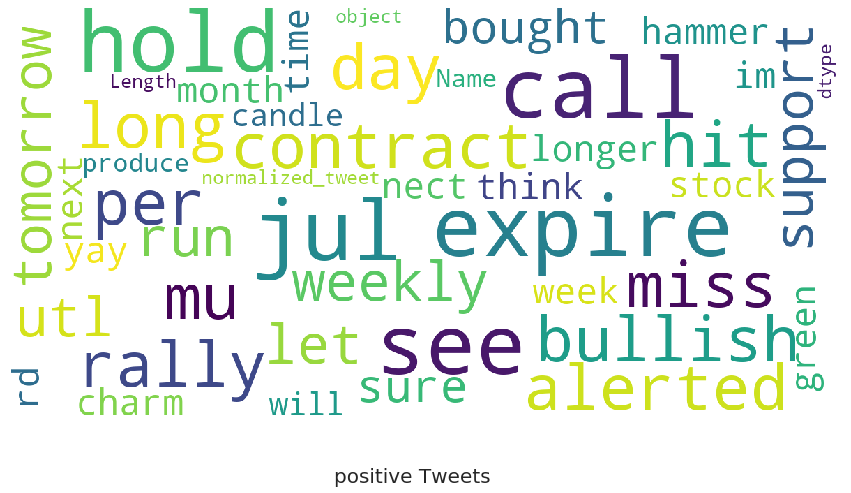

In [87]:
show_wordcloud(tweet_data[tweet_data['sentiment_score'] == 4]['normalized_tweet'],'positive Tweets')

### **Check most frequent words After removing stop words**

In [88]:
from collections import Counter
cnt = Counter()
for text in tweet_data["normalized_tweet"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('the', 245489),
 ('to', 243543),
 ('a', 201411),
 ('is', 175405),
 ('for', 166508),
 ('on', 158619),
 ('of', 146154),
 ('in', 130110),
 ('and', 128063),
 ('it', 122601)]

In [0]:
tweet_data.shape

(1039131, 5)

In [0]:
Train_AggTweetData.shape

(57606, 3)

### **Build Sentment score prediction model**

#### **Split Jweet data in Train and validation**

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(tweet_data['normalized_tweet'],tweet_data['sentiment_score'] , test_size=0.3, random_state=1234)

In [32]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(727391,)
(311740,)
(727391,)
(311740,)


In [91]:
y_train.head()

565236     3
335804     2
1019989    2
545049     2
946685     2
Name: sentiment_score, dtype: int64

In [92]:
X_train.head()

565236       grinning    squinting    face    oncoming    fist                                                             
335804       form    k                                                                                                     
1019989      expectation    are    higher    than    that    of    wall    street    for    atvi    q    reporting    amc  
545049       seee    yaaar                                                                                                 
946685       just    going    to    sit    at                                                                              
Name: normalized_tweet, dtype: object

### **Convert the text data into the vector format**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [0]:
import copy 
# using deepcopy to deep copy  
tweet_data_dcpy = copy.deepcopy(tweet_data)
stocks_data_dcpy =copy.deepcopy(stocks_data)

#### **Using Count Vector**

In [0]:
cnt_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000,decode_error='ignore')

In [36]:
cnt_Xtrain = cnt_vectorizer.fit_transform(X_train)  ## Vectorize Train data
cnt_Xval = cnt_vectorizer.transform(X_val)         ## Vectorize Test data
cnt_Xtrain

<727391x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 5113432 stored elements in Compressed Sparse Row format>

In [0]:
cnt_Original_Data = cnt_vectorizer.transform(tweet_data_dcpy['normalized_tweet'])

In [0]:
### Apply same stpes for test 
cnt_test = cnt_vectorizer.transform(test_tweet_data['normalized_tweet'])


#### **Using TF-IDF**

In [0]:
tfidf_transformer = TfidfVectorizer(stop_words='english',lowercase=True,norm=None)
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_val_tfidf = tfidf_transformer.transform(X_val)

In [0]:
# Performing same actions on Test Data
test_tfidf = tfidf_transformer.transform(test_tweet_data['normalized_tweet'])

### **Build Sentiment prediction Models (1.cntVect 2.tf-idf)**


#### **1. Logistic Regression (CntVect)**

In [0]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") #just to ignore any warnings

#Training the model
logreg = LogisticRegression()
lr_cv = logreg.fit(cnt_Xtrain, y_train)


#Predicting on train data
lr_cv_train_pred = lr_cv.predict(cnt_Xtrain)

#Predicting on validaiton data
lr_cv_val_pred=lr_cv.predict(cnt_Xval)



In [0]:
#New_senti = lr_cv.predict(cnt_Original_Data)

In [0]:
#New_senti.shape

(1039131,)

In [0]:
#tweet_data['sentiment_score'] = New_senti

In [0]:
# Predict on test data
lr_cv_test_pred=lr_cv.predict(cnt_test)

In [41]:
print("Train_Classification Report: \n\n", classification_report(y_train,lr_cv_train_pred))
print("\n\nTest_Classification Report: \n\n", classification_report(y_val,lr_cv_val_pred))

Train_Classification Report: 

               precision    recall  f1-score   support

           0       0.62      0.38      0.47     64549
           1       0.59      0.35      0.44     84586
           2       0.62      0.90      0.73    324720
           3       0.54      0.29      0.38    145859
           4       0.61      0.49      0.55    107677

    accuracy                           0.61    727391
   macro avg       0.59      0.48      0.51    727391
weighted avg       0.60      0.61      0.58    727391



Test_Classification Report: 

               precision    recall  f1-score   support

           0       0.61      0.38      0.47     27473
           1       0.58      0.35      0.43     36185
           2       0.62      0.90      0.73    139682
           3       0.53      0.29      0.37     62172
           4       0.61      0.49      0.55     46228

    accuracy                           0.61    311740
   macro avg       0.59      0.48      0.51    311740
weighted avg

#### **2. Logistic Regression(tf-idf)**

In [0]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") #just to ignore any warnings

#Training the model
logreg = LogisticRegression()
lr_cv = logreg.fit(X_train_tfidf, y_train)


#Predicting on train data
lr_tidf_train_pred = lr_cv.predict(X_train_tfidf)

#Predicting on validaiton data
lr_tidf_val_pred=lr_cv.predict(X_val_tfidf)

In [0]:
lr_tidf_test_pred=lr_cv.predict(test_tfidf)

In [0]:
print("Train_Classification Report: \n\n", classification_report(y_train,lr_tidf_train_pred))
print("\n\nTest_Classification Report: \n\n", classification_report(y_val,lr_tidf_val_pred))

Train_Classification Report: 

               precision    recall  f1-score   support

           0       0.67      0.49      0.57     64549
           1       0.65      0.37      0.47     84586
           2       0.64      0.90      0.75    324720
           3       0.57      0.34      0.43    145859
           4       0.66      0.55      0.60    107677

    accuracy                           0.64    727391
   macro avg       0.64      0.53      0.56    727391
weighted avg       0.64      0.64      0.62    727391



Test_Classification Report: 

               precision    recall  f1-score   support

           0       0.61      0.44      0.51     27473
           1       0.57      0.31      0.40     36185
           2       0.62      0.89      0.73    139682
           3       0.50      0.29      0.36     62172
           4       0.61      0.51      0.56     46228

    accuracy                           0.60    311740
   macro avg       0.58      0.49      0.51    311740
weighted avg

#### **LSTM**

In [106]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector
from keras.models import Model
from keras.models import model_from_json
from keras import regularizers
import datetime
import time
import requests as req
import json
import pandas as pd
import pickle
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [0]:
window_length = 10
encoding_dim = 3
epochs = 20
test_samples = 2000

In [0]:
inputs = Input(shape=(window_length, 1))
encoded = LSTM(encoding_dim)(inputs)

decoded = RepeatVector(window_length)(encoded)
decoded = LSTM(1, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)
sequence_autoencoder.summary()

sequence_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = sequence_autoencoder.fit(cnt_Xtrain,cnt_Xtrain,
                epochs=epochs,
                batch_size=1024,
                shuffle=True,
                validation_data=(cnt_Xval, cnt_Xval))

#decoded_stocks = sequence_autoencoder.predict(x_test)

### **Add Predicted column to test data and Merge alpha nad tweet datasets**

In [112]:
stocks_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,2018-08-21,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,2018-10-11,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,2018-08-21,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,2018-07-10,GE,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,2018-09-12,FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [0]:
test_tweet_data['sentiment_score'] = lr_cv_test_pred

In [114]:
test_tweet_data.head()

,date,ticker,stocktwit_tweet,normalized_tweet,sentiment_score
0,2018-10-25,CELG,$CELG nothing to be exited about,to be exited about,2
1,2018-07-13,AMD,"$AMD yall exhaust your buyer on first green candle,,,, byeeeeee",exhaust your buyer on first green candle byeeeeee,4
2,2018-09-25,AMD,$AMD day traders day.,trader day,2
3,2018-07-27,CBS,$CBS https://tenor.com/wLB8.gif,,2
4,2018-07-31,MU,"$MU weak price action so far today. Don’t be afraid to go short, it’s gonna break support and free fall soon",price action so far today don t be afraid to go short it s gon na break support and free fall soon,3


#### **Aggregate Train tweets sentiment data first**

In [0]:
# Train Data

Train_AggTweetData = tweet_data.groupby(['date','ticker'], as_index=False)['sentiment_score'].mean()

Train_AggTweetData.sentiment_score = Train_AggTweetData.sentiment_score.apply(np.round)

In [45]:
Train_AggTweetData.head()

,date,ticker,sentiment_score
0,2018-07-01,AABA,2.0
1,2018-07-01,AAL,3.0
2,2018-07-01,AAP,1.0
3,2018-07-01,AAPL,2.0
4,2018-07-01,ABBV,1.0


In [46]:
test_stocks_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,270007,2018-07-21,INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,270008,2018-10-05,CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,270009,2018-10-01,CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,270010,2018-10-24,CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,270011,2018-07-27,INTC,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


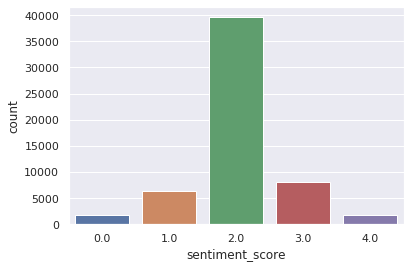

In [47]:
sns.set(style="darkgrid")
ax = sns.countplot(x="sentiment_score", data=Train_AggTweetData)

In [0]:
## Perform same steps on test data

Test_AggTweetData = test_tweet_data.groupby(['date','ticker'], as_index=False)['sentiment_score'].mean()
Test_AggTweetData.sentiment_score = Test_AggTweetData.sentiment_score.apply(np.round) 

In [49]:
Test_AggTweetData.head()

,date,ticker,sentiment_score
0,2018-07-01,AAL,0.0
1,2018-07-01,AAPL,2.0
2,2018-07-01,AEP,2.0
3,2018-07-01,AES,3.0
4,2018-07-01,ALXN,0.0


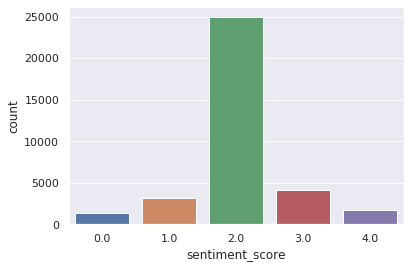

In [50]:
sns.set(style="darkgrid")
ax = sns.countplot(x="sentiment_score", data=Test_AggTweetData)

#### **Merge Sentiment scores with Alpha model now**

In [0]:
## Merge Train Data
Train_FinalMergedData = pd.merge(stocks_data, Train_AggTweetData,how='inner', left_on=['date','ticker'], right_on =['date','ticker'])

In [52]:
Train_FinalMergedData.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,sentiment_score
0,1,2018-08-21,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,2.0
1,2,2018-10-11,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,2.0
2,3,2018-08-21,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,2.0
3,4,2018-07-10,GE,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,2.0
4,9417,2018-07-10,GE,0.394782,-0.532809,0.539375,1.934485,-1.177355,1.519912,-0.959793,3,2.0


In [0]:
## Merge Test data
Test_FinalMergedData = pd.merge(test_stocks_data, Test_AggTweetData,how='left',left_on=['date','ticker'],right_on=['date','ticker'])

In [54]:
Test_FinalMergedData.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,sentiment_score
0,270007,2018-07-21,INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,3.0
1,270008,2018-10-05,CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,3.0
2,270009,2018-10-01,CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,2.0
3,270010,2018-10-24,CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,2.0
4,270011,2018-07-27,INTC,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,2.0


In [55]:
Train_FinalMergedData.isnull().sum()

Id                 0
date               0
ticker             0
SF1                0
SF2                0
SF3                0
SF4                0
SF5                0
SF6                0
SF7                0
alpha              0
sentiment_score    0
dtype: int64

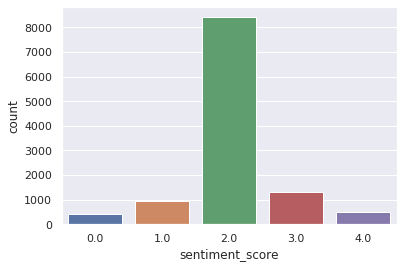

In [65]:
sns.set(style="darkgrid")
ax = sns.countplot(x="sentiment_score", data=Test_FinalMergedData)

In [0]:
Train_FinalMergedData.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,sentiment_score
0,1,2018-08-21,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,NaN
1,2,2018-11-10,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,NaN
2,3,2018-08-21,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,NaN
3,4,2018-10-07,GE,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,NaN
4,5,2018-12-09,FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,NaN


In [58]:
Train_FinalMergedData.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,sentiment_score
0,1,2018-08-21,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,2.0
1,2,2018-10-11,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,2.0
2,3,2018-08-21,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,2.0
3,4,2018-07-10,GE,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,2.0
4,9417,2018-07-10,GE,0.394782,-0.532809,0.539375,1.934485,-1.177355,1.519912,-0.959793,3,2.0


In [57]:
Test_FinalMergedData.isnull().sum()

Id                 0
date               0
ticker             0
SF1                0
SF2                0
SF3                0
SF4                0
SF5                0
SF6                0
SF7                0
sentiment_score    0
dtype: int64

In [0]:
Test_FinalMergedData.head()

,SF1,SF2,SF3,SF4,SF5,SF6,SF7,Id,date,ticker,sentiment_score
0,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,270007,2018-07-21,INTC,2.0
1,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,270008,2018-05-10,CTSH,3.0
2,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,270009,2018-01-10,CB,3.0
3,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,270010,2018-10-24,CTAS,2.0
4,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,270011,2018-07-27,INTC,2.0


## **5. Alpha signal Prediction with Sentiment Score.**

In [0]:
Train_FinalMergedDataIMPCols =  Train_FinalMergedData[['SF1', 'SF3','SF4', 'sentiment_score','alpha']]

In [0]:
### Test Data
Test_FinalMergedDataIMPCols =  Test_FinalMergedData[['SF1','SF3', 'SF4', 'sentiment_score']]

In [63]:
Train_FinalMergedDataIMPCols.head()

,SF1,SF3,SF4,sentiment_score,alpha
0,-0.628652,-0.055714,0.774379,2.0,2
1,1.315786,0.187327,0.608933,2.0,3
2,-1.141388,0.332755,0.674502,2.0,1
3,-0.054839,-0.162267,-0.681870,2.0,2
4,0.394782,0.539375,1.934485,2.0,3


In [64]:
Test_FinalMergedDataIMPCols.head()

,SF1,SF3,SF4,sentiment_score
0,-3.062194,1.741714,2.279266,3.0
1,0.816263,0.157975,-0.264743,3.0
2,0.401281,0.083411,-1.147041,2.0
3,-0.783521,0.813831,-0.368166,2.0
4,0.796507,0.679032,0.354336,2.0


In [0]:
Train_FinalMergedDataIMPCols.shape

(24839, 5)

### **Train test split**

In [66]:
trainx,valx,trainy,valy = train_test_split(Train_FinalMergedDataIMPCols.iloc[:,:-1],Train_FinalMergedDataIMPCols.iloc[:,-1],test_size=0.3,random_state=1)
print(Train_FinalMergedDataIMPCols.shape)
print(trainx.shape)
print(valx.shape)

(24839, 5)
(17387, 4)
(7452, 4)


In [0]:
#from imblearn.over_sampling import SMOTE
#smt = SMOTE()
#trainx, trainy = smt.fit_sample(trainx, trainy)

#### **MLP Neural Model**

In [0]:
import keras
from keras import regularizers, optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Defining my optimizer - Its just a refined form of SGD
## ref - https://keras.io/optimizers/
adam = keras.optimizers.Adam(lr=0.01, decay=0.0005)

## Just a way to define neural nets. There are two ways sequential and functional
## Sequential model lets you add neural net layers one after another by calling function
model = Sequential()

## Adding one layer having only one neuron
## Notice our data has 8 input columns which goes into as the "input_shape" parameter
## Notice the use of l2 regularizer
model.add(Dense(5, input_shape=(8,)))
model.add(Dense(8,))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2()))

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, batch_size=16, callbacks=[reduce_lr, earlystopper])

### **MLP Classifier**

In [0]:
valy.value_counts()

2    2936
3    1626
1    1479
4    1411
Name: alpha, dtype: int64

In [67]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='relu',batch_size=60,random_state=1234,hidden_layer_sizes=(80,))
model.fit(trainx,trainy)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=60, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(80,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
sklearn_mlp_train_preds = model.predict(trainx)
sklearn_mlp_val_preds = model.predict(valx)

In [0]:
sklearn_mlp_test_preds = model.predict(Test_FinalMergedDataIMPCols)

In [70]:
print("Train_Classification Report: \n\n", classification_report(trainy,sklearn_mlp_train_preds))
print("\n\nTest_Classification Report: \n\n", classification_report(valy,sklearn_mlp_val_preds))

Train_Classification Report: 

               precision    recall  f1-score   support

           1       0.74      0.51      0.61      3392
           2       0.84      0.97      0.90      6993
           3       0.67      0.57      0.61      3773
           4       0.66      0.76      0.71      3229

    accuracy                           0.76     17387
   macro avg       0.73      0.70      0.71     17387
weighted avg       0.75      0.76      0.75     17387



Test_Classification Report: 

               precision    recall  f1-score   support

           1       0.74      0.50      0.60      1479
           2       0.83      0.97      0.90      2936
           3       0.64      0.57      0.60      1626
           4       0.67      0.74      0.70      1411

    accuracy                           0.75      7452
   macro avg       0.72      0.70      0.70      7452
weighted avg       0.74      0.75      0.74      7452



### **Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree

In [0]:
dtc = DecisionTreeClassifier(max_depth=10)

In [73]:
 dtc.fit(trainx,trainy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
DTpred_train = dtc.predict(trainx)
DTpred_val = dtc.predict(valx)
testDtpred = dtc.predict(Test_FinalMergedDataIMPCols)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(trainy, DTpred_train)) 

              precision    recall  f1-score   support

           1       0.75      0.62      0.68      3392
           2       0.75      0.97      0.84      6993
           3       0.75      0.55      0.64      3773
           4       0.67      0.57      0.61      3229

    accuracy                           0.73     17387
   macro avg       0.73      0.68      0.69     17387
weighted avg       0.73      0.73      0.72     17387



In [78]:
from sklearn.metrics import classification_report
print(classification_report(valy, DTpred_val)) 

              precision    recall  f1-score   support

           1       0.61      0.49      0.54      1479
           2       0.72      0.93      0.81      2936
           3       0.60      0.44      0.51      1626
           4       0.56      0.50      0.53      1411

    accuracy                           0.65      7452
   macro avg       0.62      0.59      0.60      7452
weighted avg       0.64      0.65      0.64      7452



## **Random Forest**

In [79]:
from sklearn.ensemble import RandomForestClassifier
## This line instantiates the model. 
rf = RandomForestClassifier(n_estimators=300, max_depth=9) 
## Fit the model on your training data.
rf.fit(trainx,trainy) 
## And score it on your testing data.
rf.score(valx, valy)

0.668142780461621

In [0]:
RFtrain_pred = rf.predict(trainx)
RFVal_pred= rf.predict(valx)
testRFpred = rf.predict(Test_FinalMergedDataIMPCols)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(trainy, RFtrain_pred))

              precision    recall  f1-score   support

           1       0.79      0.57      0.66      3392
           2       0.71      0.98      0.82      6993
           3       0.75      0.55      0.63      3773
           4       0.71      0.55      0.62      3229

    accuracy                           0.72     17387
   macro avg       0.74      0.66      0.68     17387
weighted avg       0.73      0.72      0.71     17387



In [82]:
from sklearn.metrics import classification_report
print(classification_report(valy, RFVal_pred)) 

              precision    recall  f1-score   support

           1       0.69      0.48      0.56      1479
           2       0.68      0.96      0.80      2936
           3       0.64      0.47      0.54      1626
           4       0.62      0.48      0.54      1411

    accuracy                           0.67      7452
   macro avg       0.66      0.60      0.61      7452
weighted avg       0.66      0.67      0.65      7452



#### **GBoost**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
GBM_model = GradientBoostingClassifier(n_estimators=20,
                                       learning_rate=0.3,
                                       subsample=0.8)
GBM_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
GBM_model = GradientBoostingClassifier(n_estimators=20,
                                       learning_rate=0.3,
                                       subsample=0.8)
GBM_model.fit(X=trainx, y=trainy)
GBpred_train = GBM_model.predict(trainx)
GBpred_val = GBM_model.predict(valx)
testGBpred = GBM_model.predict(Test_FinalMergedDataIMPCols)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(trainy, GBpred_train))

              precision    recall  f1-score   support

           1       0.71      0.46      0.56      3392
           2       0.66      0.95      0.78      6993
           3       0.61      0.48      0.53      3773
           4       0.62      0.42      0.50      3229

    accuracy                           0.65     17387
   macro avg       0.65      0.58      0.59     17387
weighted avg       0.65      0.65      0.63     17387



In [87]:
from sklearn.metrics import classification_report
print(classification_report(valy, GBpred_val)) 

              precision    recall  f1-score   support

           1       0.68      0.42      0.52      1479
           2       0.66      0.93      0.77      2936
           3       0.56      0.49      0.52      1626
           4       0.55      0.38      0.45      1411

    accuracy                           0.63      7452
   macro avg       0.61      0.56      0.57      7452
weighted avg       0.62      0.63      0.61      7452



### **XGBoost**

In [89]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

XGB_model.fit(trainx,trainy)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
XGBTrain_pred = XGB_model.predict(trainx)
XGBval_pred = XGB_model.predict(valx)
testXGBpred = XGB_model.predict(Test_FinalMergedDataIMPCols)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(trainy, XGBTrain_pred))

              precision    recall  f1-score   support

           1       0.71      0.45      0.55      3392
           2       0.64      0.95      0.77      6993
           3       0.57      0.45      0.50      3773
           4       0.62      0.38      0.47      3229

    accuracy                           0.64     17387
   macro avg       0.64      0.56      0.57     17387
weighted avg       0.64      0.64      0.61     17387



In [94]:
from sklearn.metrics import classification_report
print(classification_report(valy, XGBval_pred)) 

              precision    recall  f1-score   support

           1       0.69      0.42      0.52      1479
           2       0.63      0.93      0.75      2936
           3       0.55      0.43      0.48      1626
           4       0.55      0.35      0.43      1411

    accuracy                           0.61      7452
   macro avg       0.60      0.54      0.55      7452
weighted avg       0.61      0.61      0.59      7452



### **Auto encoders**

#### **Simple feed forward Autoencoder**

In [0]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector
from keras.models import Model
from keras.models import model_from_json
from keras import regularizers
import datetime
import time
import requests as req
import json
import pandas as pd
import pickle
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [0]:
window_length = 10
encoding_dim = 3
epochs = 100
test_samples = 2000

In [0]:
x_train_simple = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_simple = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# this is our input placeholder
input_window = Input(shape=(window_length,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_window)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(window_length, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_window, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_window, encoded)


autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train_simple, x_train_simple,
                epochs=epochs,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test_simple, x_test_simple))

decoded_stocks = autoencoder.predict(x_test_simple)

### **Ensemble all the models**

#### **Train Ensembling**

In [0]:
Train_sub_all=pd.DataFrame({'model1':sklearn_mlp_train_preds,'model2':DTpred_train,'model3':RFtrain_pred,'model4':GBpred_train,'model5':XGBTrain_pred})
TrainEL_pred_mode=Train_sub_all.agg('mode',axis=1)[0].values
Train_sub_all.head()

In [0]:
TrainEL_pred_mode=[int(i) for i in TrainEL_pred_mode]

#### **Validation Ensembling**

In [0]:
validation_sub_all=pd.DataFrame({'model1':sklearn_mlp_val_preds,'model2':DTpred_val,'model3':RFVal_pred,'model4':GBpred_val,'model5':XGBval_pred})
ValELpred_mode=validation_sub_all.agg('mode',axis=1)[0].values
validation_sub_all.head()

In [0]:
ValELpred_mode=[int(i) for i in ValELpred_mode]

#### **Test Ensembling**

In [0]:
Tset = sub_all=pd.DataFrame({'model1':sklearn_mlp_test_preds,'model2':testDtpred,'model3':testRFpred,'model4':testGBpred,'model5':testXGBpred})
pred_mode=sub_all.agg('mode',axis=1)[0].values
sub_all.head()

,model1,model2,model3,model4,model5
0,4,4,4,4,4
1,4,1,1,2,2
2,2,2,2,2,2
3,1,3,1,1,1
4,4,4,4,4,4


In [0]:
pred_mode=[int(i) for i in pred_mode]

### **Submission file**


In [0]:
submission_file = pd.read_csv('sample_submission-1573207831967.csv')

In [0]:
submission = pd.DataFrame({ 'id': submission_file['id'],
                            'alpha': pred_mode })
submission.to_csv("PHD_Final_Ensembled_2 submission.csv", index=False)

## **6. Conclusion**

##### **1. Without 'Sentiment Score' Alpha signal predicted with F1 score of 0.69 on train and 0.66 on test.**
##### **2.  With 'Sentiment Score' Alpha signal predicted with F1 score of 0.77 on train and 0.73 on test.**